In [47]:
import numpy as np
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences, savgol_filter
from datetime import datetime
# Automatic Gain Control=Checked,IR PA (mA)=10,Red PA (mA)=10,IR LED Range (mA)=51,Red LED Range (mA)=51,ALC + FDM=Checked,
# Sample Rate (Hz)=100,Pulse Width (usec)=400,ADC Range (nA)=32768,FIFO Rolls on Full=Checked,FIFO Almost Full=17,Sample 
# Averaging=1,IA Gain=5,ECG Gain=8,Sample Rate=200,Adaptive Filter=Checked,Notch Freq=60,Cutoff Freq=50,

In [2]:
def convert_to_sec(t):
    t = t[14:]
    min = float(t[:t.find(":")])
    sec = float(t[t.find(":")+1:])
    total = (min*60)+sec
    return total

Time elapsed: 25.111000061035156 s


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\karst\AppData\Local\Temp\ipykernel_26048\1037642442.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("C:\data\honors project ppg data\ECPPG_2023-10-21_21-29-57.csv") #Karston


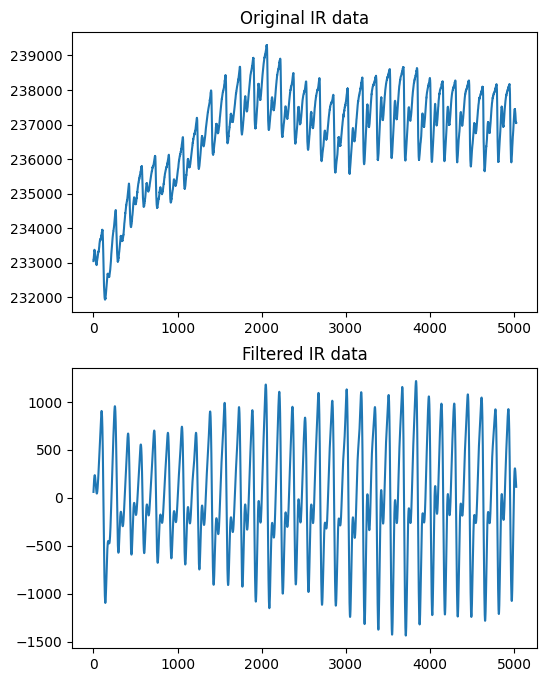

Results from turning original IR count signal of length 5025 into filtered IR count signal of 5025
This function does not add the filtered time signal into any dataset though, we'll probably work on that later
Filtered IR: [ 61.40362     81.02019581 100.14652834 ... 145.85984503 129.91808943
 114.56928268]


In [99]:
#NEW STUFF

df = pd.read_csv("C:\data\honors project ppg data\ECPPG_2023-10-21_21-29-57.csv") #Karston
#df = pd.read_csv("C:\\Users\pazul\Documents\BMEN 207\Honors Project\Coding\data\ECPPG_2023-10-21_21-29-57.csv") #Pablo

def smooth_data(dataset):
    #read in data
    signal = dataset[' IR Count']
    time = dataset['Time']

    #get sample rate
    sample_rate = hp.get_samplerate_datetime(time, timeformat = '%Y-%m-%d %H:%M:%S.%f')
    #print('sampling rate is: %.3f Hz' %sample_rate)

    #find seconds elapsed (ALL OF THIS TIME STUFF IS FOR THE PLOT SO WE DON'T REALLY NEED IT! It might be a faster way to do convert_to_sec though!)
    start = datetime.strptime(time[0], '%Y-%m-%d %H:%M:%S.%f')
    start_timedelta = start - datetime(1900, 1, 1)
    start_seconds = start_timedelta.total_seconds()

    end = datetime.strptime(time[time.index[-1]], '%Y-%m-%d %H:%M:%S.%f')
    end_timedelta = end - datetime(1900, 1, 1)
    end_seconds = end_timedelta.total_seconds()

    total_time = end_seconds - start_seconds
    print(f'Time elapsed: {total_time} s')

    #filter signal using bandpass
    filtered = hp.filter_signal(signal, [0.5, 4], sample_rate=sample_rate, order=3, filtertype='bandpass')
    
    #demonstrate effectiveness
    plt.figure(figsize=(6,8))
    plt.subplot(211)
    plt.plot(signal[0:int(total_time * sample_rate)])
    plt.title('Original IR data')
    plt.subplot(212)
    plt.plot(filtered[0:int(total_time * sample_rate)])
    plt.title('Filtered IR data')
    plt.show()

    print(f'Results from turning original IR count signal of length {len(signal)} into filtered IR count signal of {len(filtered)}')
    print(f"This function does not add the filtered time signal into any dataset though, we'll probably work on that later")
    return filtered

print(f'Filtered IR: {smooth_data(df)}')

In [10]:
df = pd.read_csv("C:\data\honors project ppg data\ECPPG_2023-10-21_21-29-57.csv") #Karston
#df = pd.read_csv("C:\\Users\pazul\Documents\BMEN 207\Honors Project\Coding\data\ECPPG_2023-10-21_21-29-57.csv") #Pablo
df.head

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\karst\AppData\Local\Temp\ipykernel_26048\2483273787.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("C:\data\honors project ppg data\ECPPG_2023-10-21_21-29-57.csv")


<bound method NDFrame.head of                          Time   Sample Count   IR Count   Red Count   Raw ECG  \
0     2023-10-21 21:30:51.750          11728     233049      209594     -7427   
1     2023-10-21 21:30:51.782          11729     233094      209607     -7419   
2     2023-10-21 21:30:51.783          11730     233090      209595     -7526   
3     2023-10-21 21:30:51.783          11731     233113      209598     -7379   
4     2023-10-21 21:30:51.783          11732     233142      209611     -7651   
...                       ...            ...        ...         ...       ...   
5020  2023-10-21 21:31:16.861          16748     237060      206019      3901   
5021  2023-10-21 21:31:16.861          16749     237052      206017      3765   
5022  2023-10-21 21:31:16.861          16750     237040      205990      3965   
5023  2023-10-21 21:31:16.861          16751     237056      205995      3713   
5024  2023-10-21 21:31:16.861          16752     237052      205999      3722  

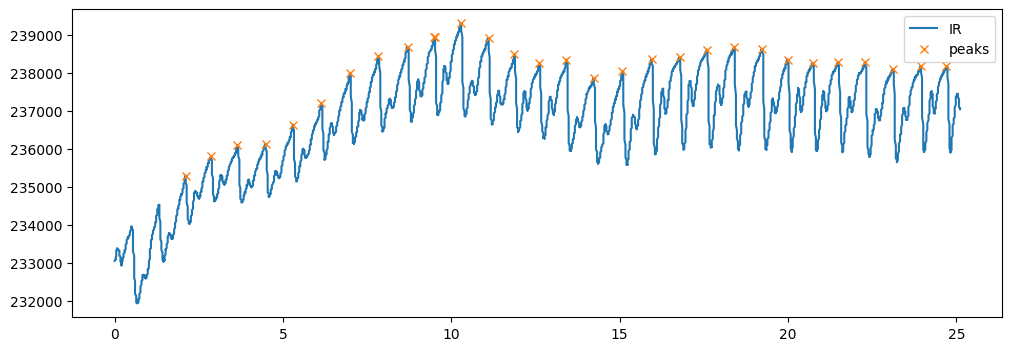

In [11]:
time = np.array([convert_to_sec(x) for x in df["Time"]]) - convert_to_sec(df["Time"][0])
time_cut = time[3000:]
IR_Count = df[" IR Count"]
IR_Count_cut = IR_Count[3000:]
Red_Count = df[" Red Count"]

peaks, _ = find_peaks(IR_Count, width= 20, height=235000)


plt.figure(figsize=(12,4))
plt.plot(time, IR_Count, label = "IR")
plt.plot(time[peaks], IR_Count[peaks], "x", label = "peaks")
plt.legend()
plt.show()

In [12]:
peak_times = sorted(list(set(np.round(time[peaks], 3))))
peak_vals = IR_Count[peaks]

print(peak_vals)
print(peak_times)
bpm = 60*(1/np.mean(np.diff(peak_times)))
print(f'BPM: {bpm}')

421     235292
574     235797
732     236093
896     236126
1062    236635
1230    237194
1397    237988
1569    238433
1740    238671
1899    238929
1901    238929
2060    239301
2220    238906
2375    238491
2526    238246
2685    238344
2850    237861
3020    238043
3195    238361
3358    238411
3521    238605
3684    238664
3844    238635
3998    238347
4149    238252
4300    238274
4462    238276
4623    238095
4790    238167
4944    238172
Name:  IR Count, dtype: int64
[2.11, 2.858, 3.642, 4.484, 5.295, 6.14, 6.985, 7.827, 8.702, 9.486, 9.518, 10.295, 11.111, 11.86, 12.609, 13.42, 14.233, 15.077, 15.953, 16.799, 17.609, 18.389, 19.234, 19.986, 20.736, 21.486, 22.299, 23.11, 23.953, 24.704]
BPM: 77.01159599893778
